In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

FILE = 'medical_no_shows_KaggleV2-May-2016.csv'

df = pd.read_csv(FILE)

print(df.head(5))

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [50]:
df = df.dropna()
select_features = ['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
df_sub = df[select_features]
typos = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}
df_sub = df_sub.rename(typos, axis=1)
genders = {'F':0, 'M':1}
df_sub['Gender'] = df_sub['Gender'].apply(lambda x: genders[x])
target = df['No-show']
target_vals = {'No':0, 'Yes':1}
target = target.apply(lambda x: target_vals[x])

from sklearn.preprocessing import StandardScaler
age_scaled = pd.DataFrame(StandardScaler().fit_transform(pd.DataFrame(df_sub['Age'])), columns=['Age_scaled'])
df_sub = pd.concat([df_sub, age_scaled], axis=1)
df_sub = df_sub.drop('Age', axis=1)
print(df_sub.head(5))
print("\nNull values in selected data: ")
print(df_sub.isna().sum())


   Gender  Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  \
0       0            0             1         0           0         0   
1       1            0             0         0           0         0   
2       0            0             0         0           0         0   
3       0            0             0         0           0         0   
4       0            0             1         1           0         0   

   SMS_received  Age_scaled  
0             0    1.077932  
1             0    0.818306  
2             0    1.077932  
3             0   -1.258708  
4             0    0.818306  

Null values in selected data: 
Gender          0
Scholarship     0
Hypertension    0
Diabetes        0
Alcoholism      0
Handicap        0
SMS_received    0
Age_scaled      0
dtype: int64


In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test_valid, y_train, y_test_valid = train_test_split(df_sub, target, test_size=0.2, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_test_valid, y_test_valid, test_size=0.5, random_state=0)

x_train.describe()

,Gender,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Age_scaled
count,88421.000000,88421.000000,88421.000000,88421.000000,88421.000000,88421.000000,88421.000000,88421.000000
mean,0.348311,0.098472,0.197329,0.071397,0.030592,0.022336,0.321145,0.000530
std,0.476438,0.297954,0.397985,0.257488,0.172211,0.162153,0.466919,0.999387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.604877
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.825997
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.003846
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.775035
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,3.371302


In [ ]:
from sklearn.tree import DecisionTreeClassifier
criteria = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']
best_score = float('-inf')
best_criterion = 'gini'
best_split = 'best'
best_depth = 1

for c in criteria:
    for s in splitter:
        for depth in range(1,11):
            score = DecisionTreeClassifier(criterion=c, splitter=s, max_depth=depth).fit(x_train, y_train).score(x_valid, y_valid)
            if score > best_score:
                best_score, best_criterion, best_split, best_depth = score, c, s, depth
print("Decision tree validation phase: the best score is %f with criteria=%s, splitter=%s, max_depth=%d"%(best_score, best_criterion, best_split, best_depth))
dtc = DecisionTreeClassifier(criterion=best_criterion, splitter=best_split, max_depth=best_depth).fit(x_train, y_train)
score = dtc.score(x_test, y_test)
print("Decision tree testing phase: score = %f"%score)



Decision tree validation phase: the best score is 0.799240 with criteria=log_loss, splitter=random, max_depth=6
Decision tree testing phase: score = 0.804578



Confusion Matrix:


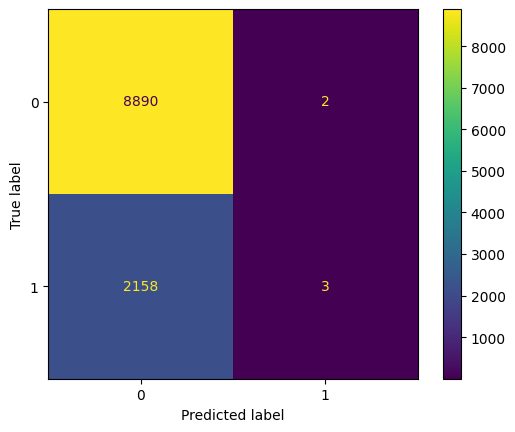

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = dtc.predict(x_test)
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
fig = ConfusionMatrixDisplay(confusion_matrix=cm)
fig.plot()

Random forest validation phhase: best score is 0.799511 with criterion=gini, n_estimators=16, max_depth=8
Random forest testing phase: score =  0.8015923278747851


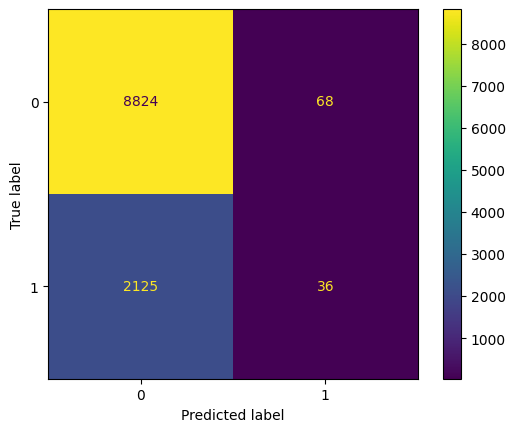

In [60]:
from sklearn.ensemble import RandomForestClassifier

best_score = float('-inf')
best_criterion = 'gini'
best_estimators = 1
best_depth = 1

for e in range(1,25):
    for c in criteria:
        for d in range(1, 11):
            score = RandomForestClassifier(n_estimators=e, criterion=c, max_depth=d).fit(x_train, y_train).score(x_valid, y_valid)
            if score > best_score:
                best_score, best_criterion, best_estimators, best_depth = score, c, e, d
print("Random forest validation phhase: best score is %f with criterion=%s, n_estimators=%d, max_depth=%d"%(best_score, best_criterion, best_estimators, best_depth))
rfc = RandomForestClassifier(n_estimators=best_estimators, criterion=best_criterion).fit(x_train, y_train)
score = rfc.score(x_test, y_test)
print("Random forest testing phase: score = ", score)
y_pred = rfc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
fig = ConfusionMatrixDisplay(confusion_matrix=cm)
fig.plot()